# Import the pokemon data again

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pokemon_df = pd.read_csv("data/pokemon.csv", index_col=0, dtype={"Generation": 'object'})
pokemon_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon_df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


# Let's plot some graph

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plotting%20backend#pandas-dataframe-plot

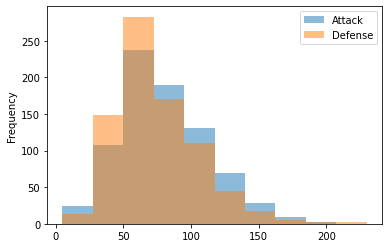

In [9]:
ax = pokemon_df[['Attack','Defense']].plot(kind='hist', alpha=.5)
plt.show()

In [11]:
gen_mean_df = pokemon_df.groupby('Generation').mean()
gen_mean_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,
1,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,0.036145
2,418.283019,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321,0.047170
3,436.225000,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000,0.112500
4,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843,0.107438
5,434.987879,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788,0.090909
6,436.378049,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024,0.097561


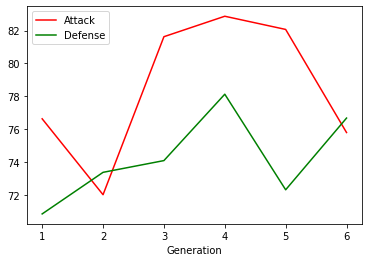

In [17]:
gen_mean_df[['Attack','Defense']].plot(kind='line', color=['r','g'])

# Plot interactive graph - Change to bokeh backend

In [21]:
!pip install pandas-bokeh

You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
pd.plotting.output_notebook()

Loading BokehJS ...

In [27]:
gen_mean_df[['Attack','Defense']].plot(kind='line', backend='pandas_bokeh', figsize=(800, 450), title="Attack and Defense through out different Generations")

Figure(id='1515', ...)

# Installing seaborn

In [28]:
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/c7/e6/54aaaafd0b87f51dfba92ba73da94151aa3bc179e5fe88fc5dfb3038e860/seaborn-0.10.1-py3-none-any.whl
    100% |████████████████████████████████| 28.7MB 751kB/s ta 0:00:01
You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [30]:
import seaborn as sns

# Plotting FacetGrid

https://seaborn.pydata.org/examples/faceted_histogram.html

In [44]:
(pokemon_df['Type 1'] == 'Water') | (pokemon_df['Type 1'] == 'Poison')

#
1      False
2      False
3      False
3      False
4      False
       ...  
719    False
719    False
720    False
720    False
721    False
Name: Type 1, Length: 800, dtype: bool

In [50]:
type_filter = (pokemon_df['Type 1'] == 'Water') | (pokemon_df['Type 1'] == 'Fire')
gen_filter = (pokemon_df['Generation'] == '1') | (pokemon_df['Generation'] == '2')
subset_pokemon = pokemon_df[type_filter & gen_filter]

In [51]:
subset_pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
230,Kingdra,Water,Dragon,540,75,95,95,95,95,85,2,False
240,Magby,Fire,NaN,365,45,75,37,70,55,83,2,False
244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True


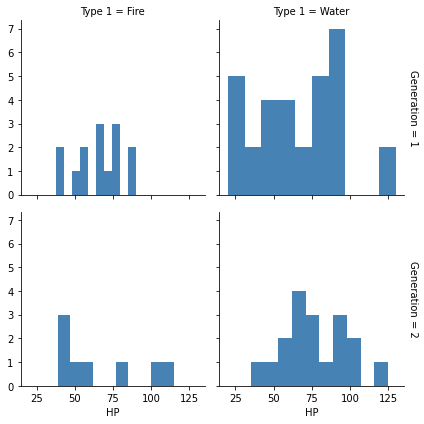

In [52]:
graph = sns.FacetGrid(subset_pokemon, row="Generation", col="Type 1", margin_titles=True)
graph.map(plt.hist, "HP", color="steelblue")

# Linear Regression - lmplot

https://seaborn.pydata.org/examples/multiple_regression.html

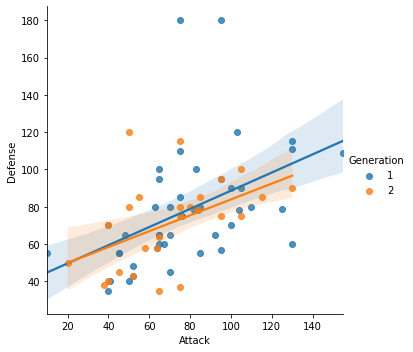

In [54]:
g = sns.lmplot(x="Attack", y="Defense", hue="Generation",
               height=5, data=subset_pokemon)

# Scatterplot Matrix - pairplot

https://seaborn.pydata.org/examples/scatterplot_matrix.html

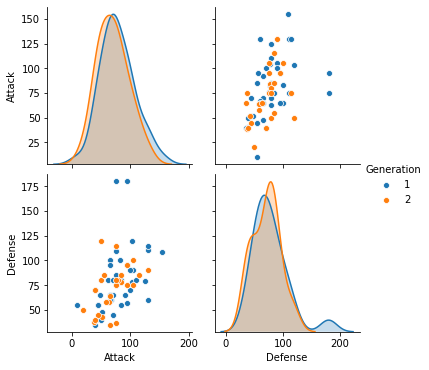

In [59]:
sns.pairplot(subset_pokemon[['Attack','Defense','Generation']], hue="Generation")

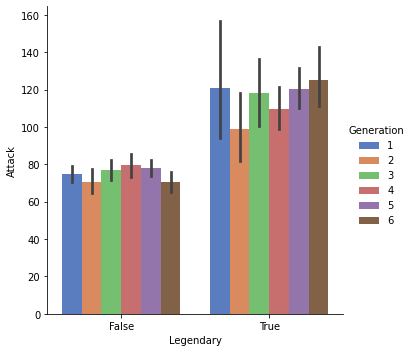

In [63]:
g = sns.catplot(x="Legendary", y="Attack", hue="Generation", data=pokemon_df, kind="bar", palette="muted")